### Import libraries

In [1]:
import sys
import numpy as np
import tensorflow as tf
import librosa
import librosa.display
import os
from IPython.display import Audio, display
import matplotlib.pyplot as plt
%matplotlib inline

### Load Audio File

In [2]:
def load_audio(path):
    display(Audio(path))

### Convert Audio to Spectogram

In [3]:
# Reads wav file and produces spectrum
def convert_audio_to_spectogram(filename):
    FFT_WINDOW_SIZE = 2048
    CLIP_SIZE = 400
    x, fs = librosa.load(filename)
    S = librosa.stft(x, FFT_WINDOW_SIZE)
    S = np.log1p(np.abs(S[:,:CLIP_SIZE]))  
    return S,fs

### Plot spectrogram

In [6]:
def plot_spectogram(images_list):
    Y_AXIS_TRIM = 250
    X_AXIS_TRIM = 300
    IMG_WIDTH = 20
    IMG_HEIGHT = 20
    MAX_PER_ROW =2

    
    
    i = 0
    
    MAX_PER_ROW = min(MAX_PER_ROW, len(images_list))
    
    while i < len(images_list):
        plt.figure(figsize=(IMG_WIDTH, IMG_HEIGHT))
        for j in range(MAX_PER_ROW):
            plt.subplot(1, MAX_PER_ROW, j+1)
            plt.title(images_list[i+ j]["name"])
            plt.imshow(images_list[i+j]["data"][:Y_AXIS_TRIM,:X_AXIS_TRIM])
            plt.gca().invert_yaxis()
        plt.show()
        i+=MAX_PER_ROW
        
def plot_spectogram_with_amplitude(images_list):
    Y_AXIS_TRIM = 250
    X_AXIS_TRIM = 300
    IMG_WIDTH = 20
    IMG_HEIGHT = 20
    MAX_PER_ROW =2

    
    
    i = 0
    
    MAX_PER_ROW = min(MAX_PER_ROW, len(images_list))
    
    while i < len(images_list):
        plt.figure(figsize=(IMG_WIDTH, IMG_HEIGHT))
        for j in range(MAX_PER_ROW):
            plt.subplot(1, MAX_PER_ROW, j+1)
            librosa.display.specshow(librosa.amplitude_to_db(images_list[i+j]["data"][:Y_AXIS_TRIM,:X_AXIS_TRIM], ref=np.max), y_axis='log', x_axis='time')
            plt.title('Power spectrogram'+images_list[i+ j]["name"])
            plt.colorbar(format='%+2.0f dB')
            plt.tight_layout()
        plt.show()
        i+=MAX_PER_ROW    
        
        

### Hyper Paramater Alpha Tuning

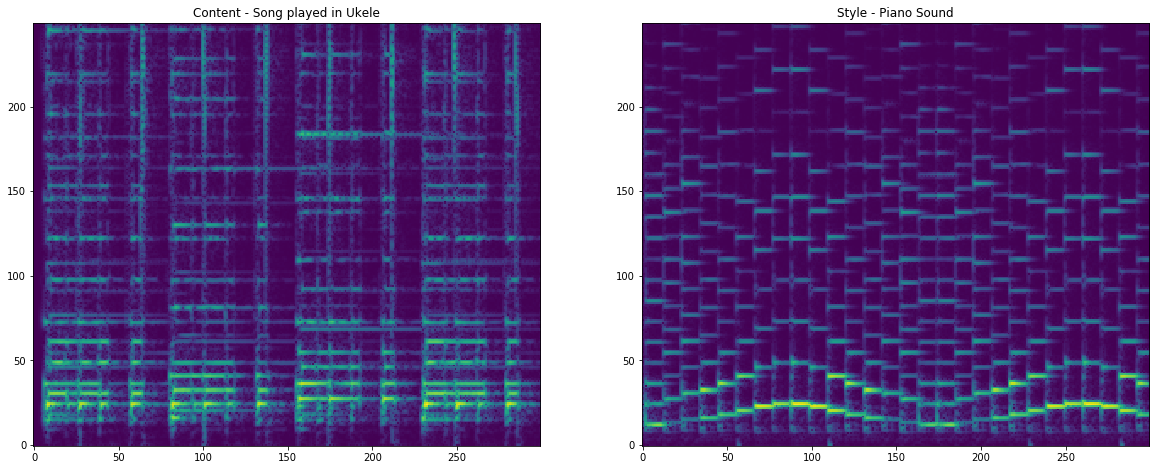

Alpha 0.001


Alpha 0.006


Alpha 0.01


Alpha 0.1


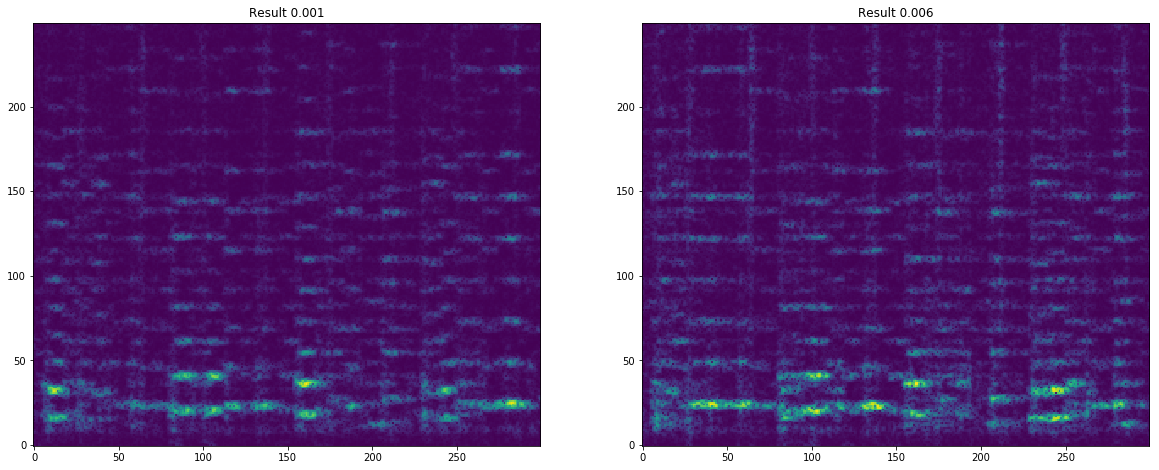

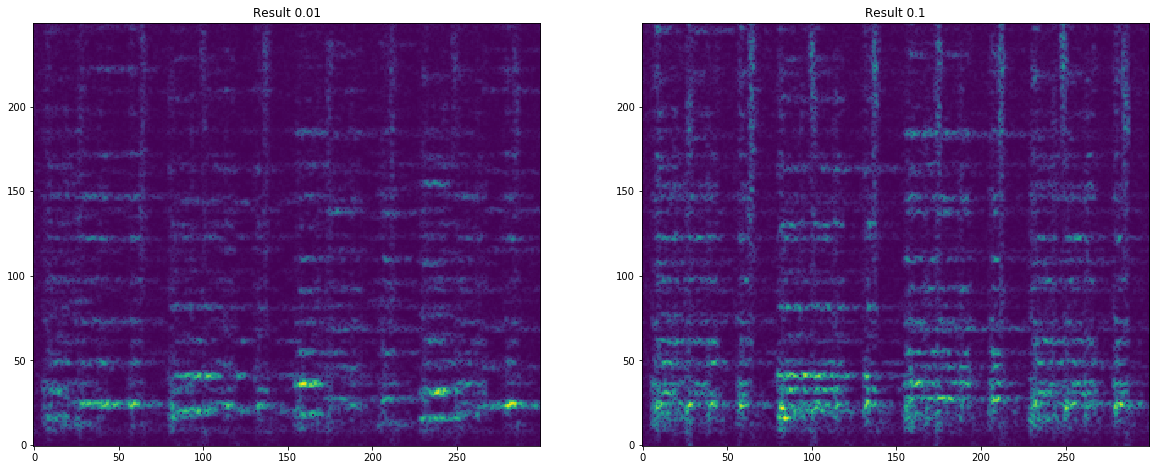

In [9]:
CONTENT_FILENAME = "inputs/bensound-ukulele.mp3"
STYLE_FILENAME = "inputs/piano-sound.wav"

a_content,fs = convert_audio_to_spectogram(CONTENT_FILENAME)
a_style, fs = convert_audio_to_spectogram(STYLE_FILENAME)

plot_spectogram([
    {
        "name":"Content - Song played in Ukele",
         "data": a_content
    },
    {
        "name":"Style - Piano Sound",
        "data": a_style
    }])


alpha_list=[0.001, 0.006, 0.01, 0.1]
results=[]


for alpha in alpha_list:
    file_name = "final-results/alpha/final-piano"+str(alpha)+".mp3"
    print "Alpha", alpha
    load_audio(file_name)
    a_result,fs = convert_audio_to_spectogram(file_name)
    results.append({"name":"Result "+str(alpha),
            "data": a_result});
    
plot_spectogram(results)